In [1]:
import pandas as pd
import seaborn as sns

In [2]:
hormones = ['ABA', 'ACC', 'Cytokinin', 'GA', 'IAA']
dfs = []
for hormone in hormones:
    pareto_df = pd.read_csv(hormone + '-pareto.csv')
    pareto_df = pareto_df[['Accession', 'Condition', 'Distance.squared', 'Alpha']]
    pareto_df = pareto_df.groupby(['Accession', 'Condition']).agg('mean').reset_index()
    na_df = pd.read_csv(hormone + '-na.csv')
    na_df = na_df[na_df['Tissue'] == 'root']
    na_df = na_df[['Accession', 'Condition', 'Na', 'K', 'Na/K.ratio']]
    na_df = na_df.groupby(['Accession', 'Condition']).agg('mean').reset_index()
    df = pd.merge(pareto_df, na_df)
    #df = pd.merge(pareto_df, na_df, on=['Accession', 'Condition'])
    #print(df)
    dfs.append(df)

full_df = pd.concat(dfs).dropna()
full_df = full_df[['Accession', 'Condition', 'Distance.squared', 'Alpha', 'Na', 'K', 'Na/K.ratio']]
#full_df = full_df.groupby(['Accession', 'Condition', 'Day']).agg('mean').reset_index()
print(full_df)

  Accession Condition  Distance.squared     Alpha         Na          K  \
0    la1511   S+10aba          0.004770  0.408333  31.023388  12.335832   
1    la1511    S+1aba          0.343746  0.489000  45.343708  29.962482   
2    la1511   S+noaba          1.997830  0.405000  34.741008  31.878767   
3      m058   S+10aba          0.364455  0.376250  45.267264  27.166715   
4      m058    S+1aba          0.388467  0.708000  26.923176  19.830604   
5      m058   S+noaba          2.400757  0.398000  29.279590  24.645677   
6      m248   S+10aba          2.871497  0.278889  40.520554  24.948921   
7      m248    S+1aba          8.265391  0.248000  37.224601  29.834349   
8      m248   S+noaba         16.259288  0.426667  41.160612  32.534764   
0    la1511    S+1acc          0.045607  0.742857  30.792875  32.280605   
1    la1511    S+5acc          1.111218  0.628571  30.992703  24.382981   
2    la1511   S+noacc          6.727535  0.417143  34.493213  34.947378   
3      m058    S+1acc    

In [3]:
full_df.to_csv('maryam-hormone-analsys.csv')

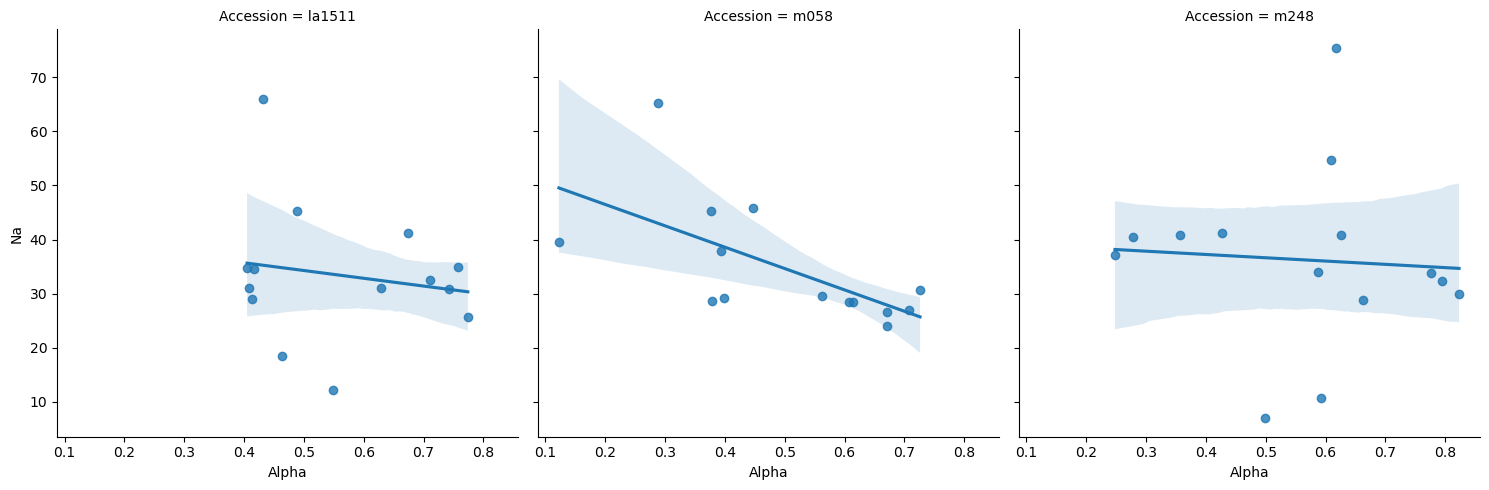

In [33]:
sns.lmplot(x='Alpha', 
           y='Na', 
           col='Accession',
           data=full_df, 
           facet_kws={'sharex' : True, 'sharey' : True})

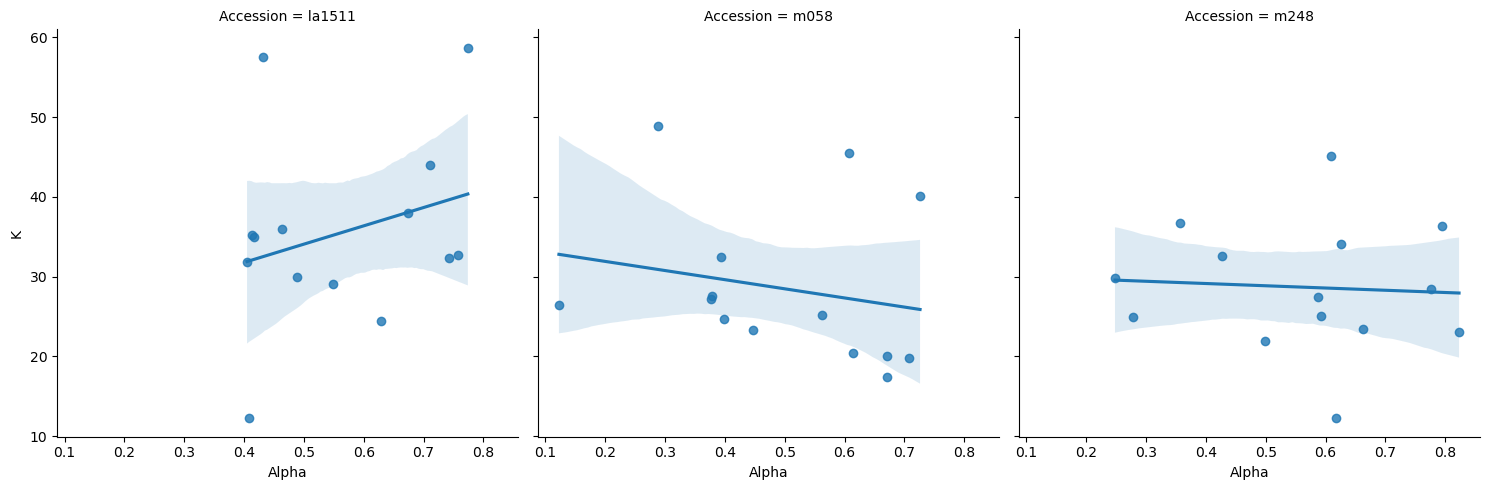

In [32]:
sns.lmplot(x='Alpha', 
           y='K', 
           col='Accession',
           data=full_df, 
           facet_kws={'sharex' : True, 'sharey' : True})

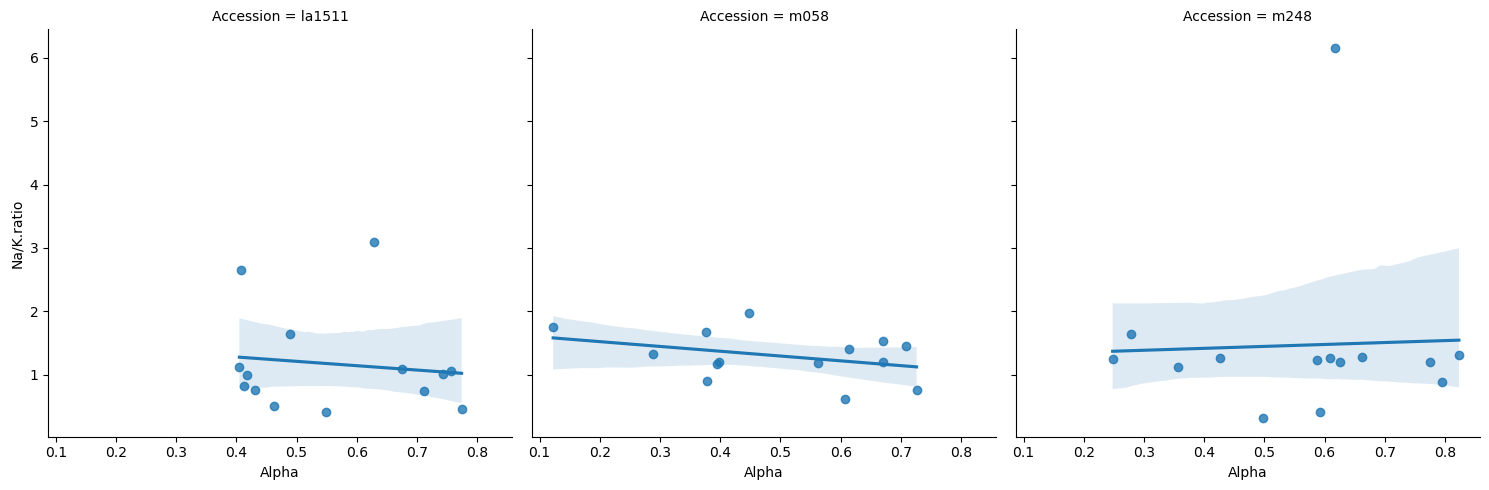

In [30]:
sns.lmplot(x='Alpha', 
           y='Na/K.ratio', 
           col='Accession',
           data=full_df, 
           facet_kws={'sharex' : True, 'sharey' : True})

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
full_df['ratio'] = full_df['Na/K.ratio']
full_df['distance'] = full_df['Distance.squared']

In [22]:
mlr = smf.ols("ratio ~ Alpha + distance + C(Accession) + C(Condition)", data=full_df).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.093
Date:                Tue, 18 Feb 2025   Prob (F-statistic):              0.412
Time:                        10:26:26   Log-Likelihood:                -44.323
No. Observations:                  42   AIC:                             124.6
Df Residuals:                      24   BIC:                             155.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
mod = smf.ols('K ~ C(Accession)', data=full_df).fit()
sm.stats.anova_lm(mod, typ=1) 

,df,sum_sq,mean_sq,F,PR(>F)
C(Accession),2.0,444.641360,222.320680,2.189631,0.125533
Residual,39.0,3959.802181,101.533389,NaN,NaN


In [26]:
md = smf.mixedlm("ratio ~ Alpha + distance + C(Accession) + C(Condition)", data=full_df, groups=full_df["Accession"], re_formula="~Alpha")

In [39]:
mdf = md.fit(method=["lbfgs"])

/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture2024/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture2024/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture2024/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 3.641440
  warnings.warn(msg, ConvergenceWarning)
/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture2024/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix 

In [40]:
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Na       
No. Observations:    42        Method:               REML     
No. Groups:          3         Scale:                169.3443 
Min. group size:     14        Log-Likelihood:       -162.3854
Max. group size:     14        Converged:            No       
Mean group size:     14.0                                     
--------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------
Intercept          45.971    6.611  6.953 0.000  33.013 58.929
Alpha             -20.732   12.108 -1.712 0.087 -44.463  3.000
Group Var           1.627                                     
Group x Alpha Cov   7.660   18.076                            
Alpha Var          39.154   45.930                            

